# Principal component analysis

In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

Importing football data.

In [2]:
stats = pd.read_excel(r'C:\Users\ludann\Desktop\Fantacalcio\data\Statistiche_Fantacalcio_2019-20.xlsx', index_col = 'Id')

In [3]:
stats.head()

R         Nome   Squadra  Pg    Mv    Mf  Gf  Gs  Rp  Rc  ...  Esp  Au  \
Id                                                            ...            
3   P    RADUNOVIC    Verona   0  0.00  0.00   0   0   0   0  ...    0   0   
4   P   SPORTIELLO  Atalanta   3  6.17  5.17   0   3   0   0  ...    0   0   
5   D       ALMICI    Verona   0  0.00  0.00   0   0   0   0  ...    0   0   
11  D        CONTI     Milan  16  5.57  5.47   0   0   0   0  ...    0   0   
15  D  MASIELLO A.     Genoa  12  5.92  5.92   0   0   0   0  ...    0   0   

    S_pg  S_v  S_p  S_s  S_gf  S_gs  S_dr  S_ptg  
Id                                                
3     25    9    8    8    29    26     3     35  
4     25   14    6    5    70    34    36     48  
5     25    9    8    8    29    26     3     35  
11    26   10    6   10    28    34    -6     36  
15    26    6    7   13    31    47   -16     25  

[5 rows x 25 columns]

In [22]:
stats.columns

Index(['R', 'Nome', 'Squadra', 'Pg', 'Mv', 'Mf', 'Gf', 'Gs', 'Rp', 'Rc', 'R+',
       'R-', 'Ass', 'Asf', 'Amm', 'Esp', 'Au', 'S_pg', 'S_v', 'S_p', 'S_s',
       'S_gf', 'S_gs', 'S_dr', 'S_ptg'],
      dtype='object')

Encoding role as number.

In [4]:
roles = stats['R'].unique()
roles_dict = {role : number for role, number in zip(roles, range(len(roles)))}
#stats['R'] = stats['R'].apply(roles_dict)
stats['R'] = stats['R'].apply(lambda x: roles_dict[x])

Customised function for PCA.

In [5]:
def get_pc(data, max_PV=0.99):
    PCA_data = data.apply(lambda x: (x - x.mean())/x.std())  # standardising
    cov_scaled = PCA_data.T @ PCA_data                       # computing (scaled) covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_scaled)    # computing eigenvalues and eigenvectors
    eigenvectors_sorted = (pd.DataFrame(eigenvectors, columns=eigenvalues, index=PCA_data.columns).
                           sort_index(ascending=False, axis=1)
                          )
    eigenvalues = np.array(eigenvectors_sorted.columns)
    ciao = 2
    eigenvectors_sorted.columns = [f'PC_{i + 1:04}' for i in range(len(eigenvalues))]
    variance_proportion = pd.DataFrame({'Eigenvalue' : eigenvalues}, index = eigenvectors_sorted.columns)
    variance_proportion['Pct_variation'] = variance_proportion['Eigenvalue']/variance_proportion['Eigenvalue'].sum()
    variance_proportion['Cum_pct_variation'] = variance_proportion['Pct_variation'].cumsum()
    max_PV_filter = variance_proportion.loc[variance_proportion['Cum_pct_variation'] <= max_PV].index
    principal_components = PCA_data @ eigenvectors_sorted[max_PV_filter]
    return np.array([principal_components, variance_proportion, eigenvectors_sorted])

In [6]:
PCA_data = stats.loc[:, stats.dtypes != object].drop(['Mv', 'Mf'], axis = 1)
PCA_data.shape

(719, 21)

In [7]:
PC, PV, loadings = get_pc(PCA_data, max_PV=1)

In [8]:
PC.T @ PC

PC_0001       PC_0002       PC_0003       PC_0004       PC_0005  \
PC_0001  3.876804e+03  6.963319e-13  1.051603e-12 -1.989520e-13  3.939071e-13   
PC_0002  6.963319e-13  2.410467e+03  1.151079e-12  1.563194e-12 -5.115908e-13   
PC_0003  1.051603e-12  1.151079e-12  1.433628e+03 -1.325939e-12 -4.440892e-14   
PC_0004 -1.989520e-13  1.563194e-12 -1.325939e-12  1.268880e+03 -1.314504e-13   
PC_0005  3.939071e-13 -5.115908e-13 -4.440892e-14 -1.314504e-13  8.152279e+02   
PC_0006 -5.684342e-14 -2.735590e-13 -1.314504e-13 -4.440892e-13  7.496226e-13   
PC_0007 -1.278977e-13 -5.364598e-13 -7.815970e-14 -1.629807e-13  2.601253e-13   
PC_0008 -1.083578e-12  3.446132e-13 -3.215206e-13 -5.790923e-13 -1.177725e-12   
PC_0009  1.065814e-13  2.131628e-13 -3.552714e-14 -2.700062e-13  7.105427e-13   
PC_0010 -3.463896e-13  4.583001e-13  2.455813e-13  3.366196e-13 -8.348877e-14   
PC_0011 -1.705303e-13  1.421085e-13 -6.927792e-14 -7.887024e-13  5.044853e-13   
PC_0012  1.314504e-13  1.612488e-12 -5.266898e-13 -7.744916e-13  2.891021e-13   
PC_0013  4.014566e-13 -1.323386e-13  3.392842e-13  7.194245e-14 -1.865175e-14   
PC_0014 -2.486900e-14 -2.287059e-13  5.577760e-13 -5.644374e-13  3.659295e-13   
PC_0015 -6.359357e-13 -2.913225e-13  3.286260e-14 -4.742873e-13  1.421085e-13   
PC_0016 -2.566836e-13  7.354117e-13  3.295142e-13  1.734168e-13 -8.970602e-14   

              PC_0006       PC_0007       PC_0008       PC_0009       PC_0010  \
PC_0001 -5.684342e-14 -1.278977e-13 -1.083578e-12  1.065814e-13 -3.463896e-13   
PC_0002 -2.735590e-13 -5.364598e-13  3.446132e-13  2.131628e-13  4.583001e-13   
PC_0003 -1.314504e-13 -7.815970e-14 -3.215206e-13 -3.552714e-14  2.455813e-13   
PC_0004 -4.440892e-13 -1.629807e-13 -5.790923e-13 -2.700062e-13  3.366196e-13   
PC_0005  7.496226e-13  2.601253e-13 -1.177725e-12  7.105427e-13 -8.348877e-14   
PC_0006  7.596145e+02  3.286260e-13 -1.428191e-12  6.892265e-13 -6.039613e-14   
PC_0007  3.286260e-13  7.255341e+02  2.223111e-12  2.309264e-13  2.415845e-13   
PC_0008 -1.428191e-12  2.223111e-12  6.665684e+02  1.932676e-12 -5.103695e-13   
PC_0009  6.892265e-13  2.309264e-13  1.932676e-12  6.492374e+02  3.370637e-13   
PC_0010 -6.039613e-14  2.415845e-13 -5.103695e-13  3.370637e-13  5.515649e+02   
PC_0011  3.161915e-13  1.705303e-13 -4.787282e-13 -1.196376e-12  1.847411e-13   
PC_0012 -1.900702e-13 -7.149836e-14 -6.856737e-13 -1.669775e-13 -1.665335e-13   
PC_0013 -1.705303e-13  6.883383e-14  2.851053e-13 -2.025047e-13  6.927792e-14   
PC_0014  4.236611e-13  1.176836e-14 -3.694822e-13 -6.332712e-13 -4.032330e-13   
PC_0015  1.335043e-14 -1.287859e-13  1.243450e-14 -2.202682e-13 -1.936229e-13   
PC_0016  1.736389e-13  2.038369e-13 -1.953993e-14 -8.384404e-13 -2.410017e-13   

              PC_0011       PC_0012       PC_0013       PC_0014       PC_0015  \
PC_0001 -1.705303e-13  1.314504e-13  4.014566e-13 -2.486900e-14 -6.359357e-13   
PC_0002  1.421085e-13  1.612488e-12 -1.323386e-13 -2.287059e-13 -2.913225e-13   
PC_0003 -6.927792e-14 -5.266898e-13  3.392842e-13  5.577760e-13  3.286260e-14   
PC_0004 -7.887024e-13 -7.744916e-13  7.194245e-14 -5.644374e-13 -4.742873e-13   
PC_0005  5.044853e-13  2.891021e-13 -1.865175e-14  3.659295e-13  1.421085e-13   
PC_0006  3.161915e-13 -1.900702e-13 -1.705303e-13  4.236611e-13  1.335043e-14   
PC_0007  1.705303e-13 -7.149836e-14  6.883383e-14  1.176836e-14 -1.287859e-13   
PC_0008 -4.787282e-13 -6.856737e-13  2.851053e-13 -3.694822e-13  1.243450e-14   
PC_0009 -1.196376e-12 -1.669775e-13 -2.025047e-13 -6.332712e-13 -2.202682e-13   
PC_0010  1.847411e-13 -1.665335e-13  6.927792e-14 -4.032330e-13 -1.936229e-13   
PC_0011  4.594990e+02  8.792966e-13 -1.474376e-13  7.700507e-13 -5.746514e-13   
PC_0012  8.792966e-13  4.382981e+02  5.506706e-13  2.597922e-13  3.055334e-13   
PC_0013 -1.474376e-13  5.506706e-13  3.367111e+02  7.411849e-13 -4.494183e-13   
PC_0014  7.700507e-13  2.597922e-13  7.411849e-13  2.904445e+02 -5.488943e-13   
PC_0015 -5.746514e-13  3.055334e-13 -4.4941

In [9]:
PV

Eigenvalue  Pct_variation  Cum_pct_variation
PC_0001  3.876804e+03   2.571166e-01           0.257117
PC_0002  2.410467e+03   1.598665e-01           0.416983
PC_0003  1.433628e+03   9.508079e-02           0.512064
PC_0004  1.268880e+03   8.415443e-02           0.596218
PC_0005  8.152279e+02   5.406738e-02           0.650286
PC_0006  7.596145e+02   5.037900e-02           0.700665
PC_0007  7.255341e+02   4.811872e-02           0.748783
PC_0008  6.665684e+02   4.420801e-02           0.792991
PC_0009  6.492374e+02   4.305859e-02           0.836050
PC_0010  5.515649e+02   3.658077e-02           0.872631
PC_0011  4.594990e+02   3.047479e-02           0.903106
PC_0012  4.382981e+02   2.906871e-02           0.932174
PC_0013  3.367111e+02   2.233128e-02           0.954506
PC_0014  2.904445e+02   1.926280e-02           0.973768
PC_0015  2.217885e+02   1.470941e-02           0.988478
PC_0016  1.125769e+02   7.466302e-03           0.995944
PC_0017  6.115495e+01   4.055906e-03           1.000000
PC_0018  1.357040e-12   9.000136e-17           1.000000
PC_0019 -2.132650e-15  -1.414412e-19           1.000000
PC_0020 -6.971301e-13  -4.623492e-17           1.000000
PC_0021 -1.416030e-12  -9.391364e-17           1.000000

Eliminating variables based on contribution to PCs.

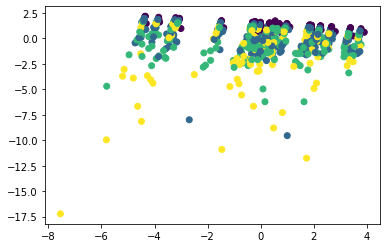

In [69]:
plot = plt.scatter(PC['PC_0001'], PC['PC_0002'], c=stats['R'], label=stats['Nome'])

## Reducing number of variables to use, using loadings.

Getting magnitude of factor loadings.

In [34]:
loadings.applymap(abs).idxmax()

PC_0001     S_dr
PC_0002       Rc
PC_0003       Gs
PC_0004       Rp
PC_0005      S_p
PC_0006      S_p
PC_0007     S_pg
PC_0008       Au
PC_0009      Asf
PC_0010        R
PC_0011       R-
PC_0012       R-
PC_0013     S_gs
PC_0014       Gf
PC_0015       Rp
PC_0016       Pg
PC_0017     S_gs
PC_0018      S_v
PC_0019      S_s
PC_0020    S_ptg
PC_0021       Rc
dtype: object